In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

In [2]:
def cubic_spline_interpolation(xin, yin, xout):
    N = len(xin) - 1

    # Calculate intervals
    h = np.diff(xin)

    # Set up tridiagonal system for natural spline (m0 = mN = 0)
    lower_diag = h[:-1]
    main_diag = 2 * (h[:-1] + h[1:])
    upper_diag = h[1:]

    diagonals = [lower_diag, main_diag, upper_diag]
    A = diags(diagonals, offsets=[-1, 0, 1], shape=(N-1, N-1), format='csc')

    # Right-hand side
    d = (yin[2:] - yin[1:-1]) / h[1:] - (yin[1:-1] - yin[:-2]) / h[:-1]
    b = 6 * d

    # Solve for m1 through m_{N-1}
    m_interior = spsolve(A, b)

    # Natural spline: m0 = mN = 0
    m = np.concatenate(([0], m_interior, [0]))

    # Coefficients
    a_coeff = yin[:-1]
    b_coeff = (yin[1:] - yin[:-1]) / h - h * (2*m[:-1] + m[1:]) / 6
    c_coeff = m[:-1] / 2
    d_coeff = (m[1:] - m[:-1]) / (6 * h)

    # Evaluate spline at output points
    yout = np.zeros_like(xout, dtype=float)
    for k, xk in enumerate(xout):
        # Find interval index
        ind = np.searchsorted(xin, xk) - 1
        if ind < 0:
            ind = 0
        if ind >= N:
            ind = N - 1

        dx = xk - xin[ind]
        yout[k] = a_coeff[ind] + b_coeff[ind]*dx + c_coeff[ind]*dx**2 + d_coeff[ind]*dx**3

    return yout

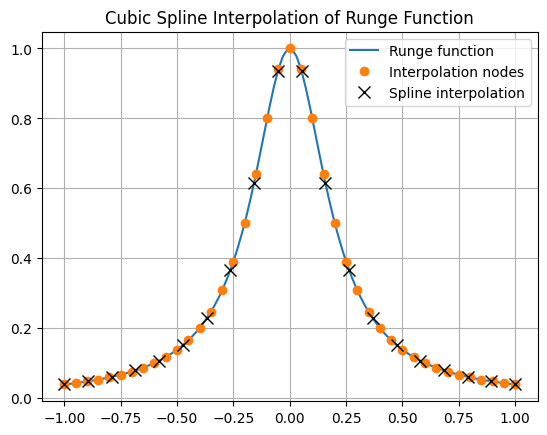

In [3]:
# ---------------- MAIN SCRIPT ----------------

N = 40
Nout = 20
numMesh = 100

runge = lambda x: 1.0 / (1 + 25*x**2)

xMesh = np.linspace(-1, 1, numMesh)
yMesh = runge(xMesh)

plt.figure()
plt.plot(xMesh, yMesh, label="Runge function")

xin = np.linspace(-1, 1, N+1)
yin = runge(xin)
plt.plot(xin, yin, 'o', label="Interpolation nodes")

xout = np.linspace(-1, 1, Nout)
yout = cubic_spline_interpolation(xin, yin, xout)

plt.plot(xout, yout, 'kx', markersize=8, linewidth=2, label="Spline interpolation")

plt.legend()
plt.title("Cubic Spline Interpolation of Runge Function")
plt.grid(True)
plt.show()
